Predicting Stock Prices:Time Series Model

In [2]:
#GARCH Model(AR)and(MA)


Download daily prices for the last 10 years for the NVDA stock

In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd 
import numpy as np
import statsmodels.api as sm



In [4]:
nvda_stock=yf.download(tickers='NVDA', start='2012-01-01', end='2023-01-29')
nvda_stock.head(20)

[*********************100%***********************]  1 of 1 completed


Open    High     Low   Close  Adj Close     Volume
Date                                                            
2012-01-03  3.5750  3.6000  3.5025  3.5100   3.220763   46804400
2012-01-04  3.5125  3.5650  3.4800  3.5500   3.257467   34737200
2012-01-05  3.5325  3.6950  3.5175  3.6775   3.374461   56354800
2012-01-06  3.6750  3.6775  3.5925  3.6350   3.335462   53325200
2012-01-09  3.6375  3.7050  3.6100  3.6350   3.335462   50824400
2012-01-10  3.6900  3.6925  3.5950  3.6200   3.321698   54632800
2012-01-11  3.5875  3.6200  3.5325  3.5475   3.255173   48427200
2012-01-12  3.5550  3.5575  3.4475  3.5250   3.234528   65236400
2012-01-13  3.5000  3.5075  3.4150  3.4325   3.149650   50430000
2012-01-17  3.4850  3.4850  3.3750  3.3800   3.101476   62717600
2012-01-18  3.4450  3.5225  3.4275  3.4950   3.206999   63267600
2012-01-19  3.5250  3.5925  3.4875  3.5875   3.291878   60831200
2012-01-20  3.5825  3.6250  3.5425  3.5550   3.262055   54627200
2012-01-23  3.5575  3.6550  3.5125  3.6525   3.351520   56279200
2012-01-24  3.6275  3.7500  3.6250  3.7350   3.427223   73092000
2012-01-25  3.6350  3.7225  3.5300  3.7125   3.406577  127415200
2012-01-26  3.7675  3.8100  3.6575  3.6775   3.374461   79967200
2012-01-27  3.6550  3.7475  3.6250  3.7275   3.420340   44999600
2012-01-30  3.6625  3.7175  3.6075  3.7000   3.395106   39907600
2012-01-31  3.7100  3.7125  3.6275  3.6925   3.388225   35790000

Calculate log returns and plot the autocorrelation and partial-autocorrelation graphs for log returns, then do the same for daily volatility.

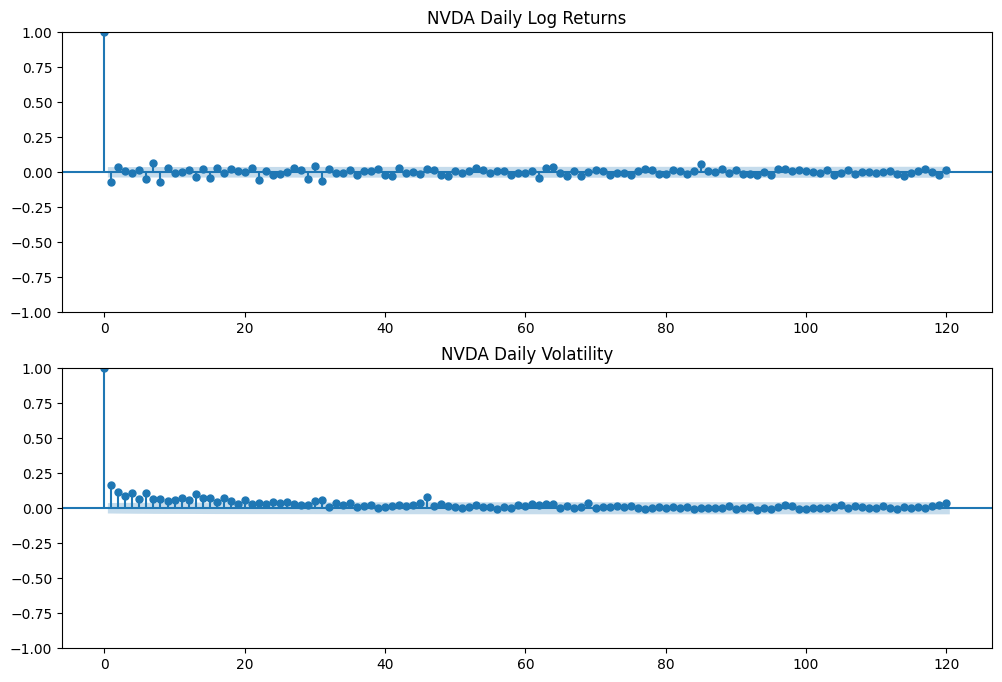

In [5]:
#Calculate log returns
nvda_log_ret = np.log(nvda_stock['Adj Close']).diff().dropna()

#Calculate daily volatility
nvda_daily_vol = (nvda_log_ret-nvda_log_ret.mean())**2

#plot autocorrelation and partila correlation graphs for log returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sm.graphics.tsa.plot_acf(nvda_log_ret, lags=120, ax=ax1)
ax1.set(title='NVDA Daily Log Returns')

sm.graphics.tsa.plot_acf(nvda_daily_vol, lags=120, ax=ax2)
ax2.set(title='NVDA Daily Volatility')

plt.show()


 Fit models with the different orders of Autoregression and Moving Averages, in an attempt to find the model which minimizes the RMSE and BIC

In [6]:
from arch import arch_model
from sklearn.metrics import mean_squared_error

trainsize = 10 * 252

data = nvda_log_ret.clip(lower=nvda_log_ret.quantile(.05),
                     upper=nvda_log_ret.quantile(.95))

T = len(nvda_log_ret)

results = {}

for p in range(1, 5):
    
    for q in range(1, 5):
        
        print(f'{p} | {q}')

        result = []

        for s, t in enumerate(range(trainsize, T-1)):

            train_set = data.iloc[s:t]

            test_set = data.iloc[t+1]

            model = arch_model(y=train_set, p=p, q=q).fit(disp='off')

            forecast = model.forecast(horizon=1)

            mu = forecast.mean.iloc[-1, 0]

            var = forecast.variance.iloc[-1, 0]

            result.append([(test_set-mu)**2, var])

        df = pd.DataFrame(result, columns=['y_true', 'y_pred'])
        y_rescaled = 100 * df.y_true

        results[(p, q)] = np.sqrt(mean_squared_error(df.y_true, df.y_pred))

pd.DataFrame(results, index=pd.Series(0)).unstack().idxmin()


1 | 1


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec

1 | 2


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

1 | 3


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

1 | 4


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

2 | 1


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec

2 | 2


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

2 | 3


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

2 | 4


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

3 | 1


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

3 | 2


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

3 | 3


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

3 | 4


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec

4 | 1


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

4 | 2


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

4 | 3


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

4 | 4


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec

(4, 2, 0)

Define a function to predict the next day’s variance using a rolling window, as well calculate the stock variance using the same rolling window

In [9]:
def predict_volatility(x):
    # Replace this function with your own code that predicts volatility based on the input data
    return np.sqrt(np.mean(x ** 2))


data = nvda_log_ret.to_frame('nvda_log_ret')

data = data['2020':]

data['variance'] = data['nvda_log_ret'].rolling(70).var()

data['predictions'] = data['nvda_log_ret'].rolling(70).apply(lambda x: predict_volatility(x))

data

nvda_log_ret  variance  predictions
Date                                           
2020-01-02      0.019403       NaN          NaN
2020-01-03     -0.016136       NaN          NaN
2020-01-06      0.004185       NaN          NaN
2020-01-07      0.012034       NaN          NaN
2020-01-08      0.001874       NaN          NaN
...                  ...       ...          ...
2023-01-23      0.073158  0.001440     0.038354
2023-01-24      0.003744  0.001437     0.038347
2023-01-25      0.003006  0.001422     0.038061
2023-01-26      0.024487  0.001354     0.037417
2023-01-27      0.028035  0.001324     0.036939

[774 rows x 3 columns]

Plot the predicted variance and the actual rolling variance.

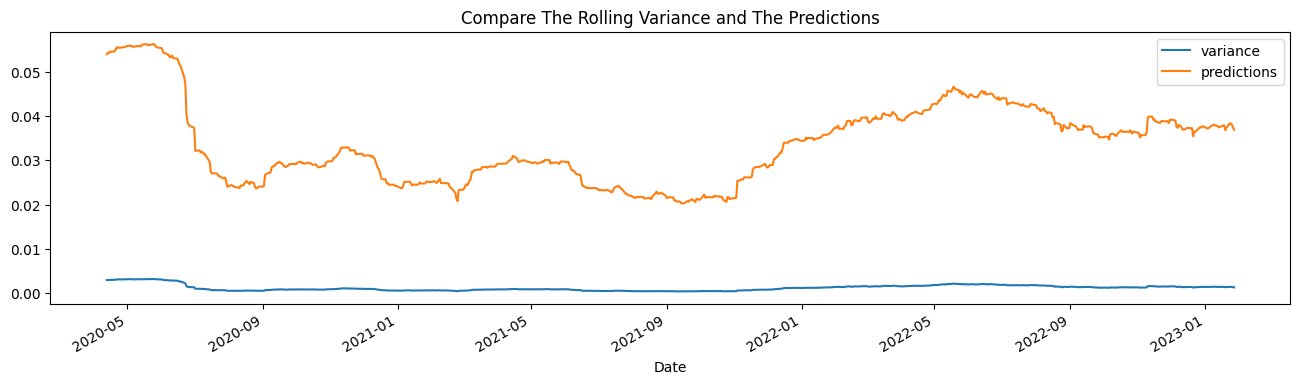

In [10]:
data[['variance', 'predictions']].plot(figsize=(16,4))

plt.title('Compare The Rolling Variance and The Predictions')

plt.show()